# Pandas

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('iris.csv', sep=';')

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 6)

In [8]:
print(df.columns.values)

['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'
 'Species']


In [10]:
df.sort_values(by="SepalLengthCm", ascending=False).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


In [11]:
df.sort_values(by=["SepalLengthCm", "SepalWidthCm"], ascending=[True, False]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa


In [12]:
df["SepalLengthCm"].mean()

5.843333333333335

In [15]:
df[df["SepalLengthCm"] == 4.4].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
8,9,4.4,2.9,1.4,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa


In [16]:
df[(df["SepalLengthCm"] == 4.4) & (df["SepalWidthCm"] == 3.0)].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,39,4.4,3.0,1.3,0.2,Iris-setosa


In [17]:
df[(df["SepalLengthCm"] == 4.4)]["SepalWidthCm"].mean()

3.0333333333333337

In [18]:
df.loc[0:5, "SepalLengthCm":"PetalLengthCm"]

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
5,5.4,3.9,1.7


In [19]:
df.iloc[0:5, 0:3]

,Id,SepalLengthCm,SepalWidthCm
0,1,5.1,3.5
1,2,4.9,3.0
2,3,4.7,3.2
3,4,4.6,3.1
4,5,5.0,3.6


#  Scraping

In [39]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [22]:
car_model = []
year = []
engine_volume = []

mileage = []
fuel = []
gearbox = []

steering_wheel = []
body_type = []
location = []
price_USD = []

In [25]:
for n in range(1, 2):
    html_text = requests.get(f'https://www.mashina.kg/search/toyota/?currency=2&price_from=&price_to=&page={n}').text
    
    soup = BeautifulSoup(html_text, 'lxml')
    sales= soup.find_all('div', class_ = 'list-item list-label')  
    for i in sales:      
    
        model = soup.find_all('h2', class_ = 'name')
        for i in model:
            car_model.append(i.text.replace(" ", "").replace("\n", ""))

        car_info = soup.find_all('p', class_ = 'year-miles')
        for i in car_info:
            year.append(i.text.replace(' ', '').replace('\n', '').replace('г.', '').split(',')[0])
        for i in car_info:
            engine_volume.append(i.text.replace(' ', '').replace('\n', '').replace('л.', '').split(',')[1])
        for i in car_info:
            gearbox.append(i.text.replace(' ', '').replace('\n', '').split(',')[2])

        type = soup.find_all('p', class_ = 'body-type')
        for i in type:
            body_type.append(i.text.replace(' ', '').replace('\n', '').replace('.', '').split(',')[0])
            fuel.append(i.text.replace(' ', '').replace('\n', '').split(',')[1])

        car_info_1= soup.find_all('p', class_ = 'volume')
        for i in car_info_1:
            steering_wheel.append(i.text.replace('руль', '').replace(' ', '').replace('\n', '').split(',')[0])
        if len(i.text.replace(' ', '').replace('\n', '').split(',')) == 1:
            mileage.append(None)
        else:
            mileage.append(i.text.replace(' ', '').replace('\n', '').replace('км', '').split(',')[1])

        car_info_2 = soup.find_all('p', class_ = 'price')
        for i in car_info_2:
            price_USD.append(i.find('strong').text.replace('\n', '').replace(' ', '').split('$')[1])

        car_info_3= soup.find_all('p', class_ = 'city')
        for i in car_info_3:
            location.append(i.text.replace('\n', '').replace('.', '').split()[0])

In [26]:
df = pd.DataFrame(list(zip(car_model, year, engine_volume, mileage, fuel, gearbox, steering_wheel, body_type,  location, price_USD)), columns = ['CarModel','ProductionYear', 'EngineVolume' ,'Mileage', 'Fuel', 'GearboxMechanism', 'SteeringWheelLocation' ,'BodyType', 'CarLocation', 'PriceUSD'])
df

,CarModel,ProductionYear,EngineVolume,Mileage,Fuel,GearboxMechanism,SteeringWheelLocation,BodyType,CarLocation,PriceUSD
0,ToyotaCrown,2004,3,156000,бензин,автомат,справа,седан,Бишкек,8250
1,ToyotaLandCruiser,2012,4.6,156000,бензин,автомат,слева,внедорожник5дв,Бишкек,38800
2,ToyotaPrius,2007,1.5,156000,гибрид,автомат,слева,хэтчбек5дв,Бишкек,9800
3,ToyotaCamry,2010,2.5,156000,бензин,автомат,слева,седан,Бишкек,12150
4,ToyotaCamry,2016,2.5,156000,гибрид,вариатор,слева,седан,Шопоков,16700
...,...,...,...,...,...,...,...,...,...,...
65,ToyotaCamry,2005,2.4,156000,бензин,автомат,слева,седан,Бишкек,9300
66,ToyotaCamry,2011,2.5,156000,бензин,автомат,слева,седан,Бишкек,12000
67,ToyotaWindom,2003,3,156000,бензин,автомат,справа,седан,Бишкек,7500
68,ToyotaHighlander,2011,3.5,156000,бензин,автомат,слева,внедорожник5дв,Бишкек,20300


In [27]:
df['SteeringWheelLocation'] = df['SteeringWheelLocation'].map( { 'слева': 0, 'справа': 1} ).astype(int)

In [28]:
df["Mileage"] = pd.to_numeric(df["Mileage"])
df["ProductionYear"] = pd.to_numeric(df["ProductionYear"])
df["EngineVolume"] = pd.to_numeric(df["EngineVolume"])
df["PriceUSD"] = pd.to_numeric(df["PriceUSD"])

In [29]:
df['ProductionYear']= df['ProductionYear'].astype(int)
df["EngineVolume"]= df["EngineVolume"].astype(int)
df['PriceUSD']= df['PriceUSD'].astype(int)

In [30]:
df['Mileage'] = df['Mileage'].fillna(value = df['Mileage'].mean())

In [31]:
df = pd.concat([df, pd.get_dummies(df['CarModel'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['CarLocation'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['Fuel'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['GearboxMechanism'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['BodyType'])],axis=1)

In [34]:
df.pop('CarModel')
df.pop('Fuel')
df.pop('GearboxMechanism')
df.pop('BodyType')
df.pop('CarLocation')

0              седан
1     внедорожник5дв
2         хэтчбек5дв
3              седан
4              седан
           ...      
65             седан
66             седан
67             седан
68    внедорожник5дв
69             седан
Name: BodyType, Length: 70, dtype: object

In [35]:
df.pop('CarLocation')

0      Бишкек
1      Бишкек
2      Бишкек
3      Бишкек
4     Шопоков
       ...   
65     Бишкек
66     Бишкек
67     Бишкек
68     Бишкек
69     Бишкек
Name: CarLocation, Length: 70, dtype: object

Random Forest

In [37]:
y = df['PriceUSD']
x=df
x.pop('PriceUSD')

0      8250
1     38800
2      9800
3     12150
4     16700
      ...  
65     9300
66    12000
67     7500
68    20300
69    16200
Name: PriceUSD, Length: 70, dtype: int32

In [38]:
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.8, test_size=0.2)

In [40]:
model = RandomForestRegressor(n_estimators=200)

In [41]:
model.fit(x,y)

RandomForestRegressor(n_estimators=200)

In [42]:
model.score(x_train,y_train)

0.9990739916878094

In [43]:
model.score(x_test,y_test)

0.9977014948753655

In [44]:
importances = model.feature_importances_

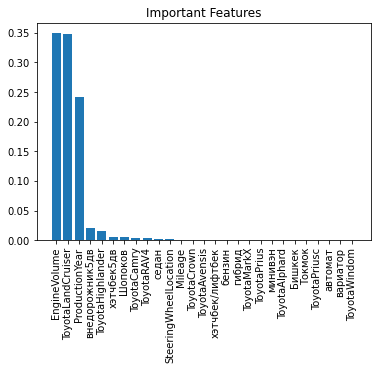

In [45]:
indices = np.argsort(importances)[::-1]
names = [x_train.columns.values[i] for i in indices]

plt.figure()
plt.title("Important Features")

plt.bar(range(x_train.shape[1]), importances[indices])

plt.xticks(range(x_train.shape[1]), names, rotation=90)

plt.show ()

Linear Regression

In [46]:
from sklearn import linear_model

In [48]:
model1= linear_model.LinearRegression()
model1.fit(x,y)

LinearRegression()

In [49]:
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=100)

In [50]:
model1.score(x,y)

0.9944377890749054

In [51]:
model1.coef_

array([ 8.02754929e+02,  2.93727141e+03,  9.73377560e-05, -2.17892751e+03,
       -1.11992897e+03, -1.03750878e+03, -5.58213986e+02, -4.63472147e+02,
       -3.35666367e+03,  1.23395432e+04, -1.82619075e+02,  1.01592275e+03,
       -1.83280628e+03, -4.39134571e+03, -4.12907318e+02, -2.78813313e+02,
        2.78813313e+02,  7.37109442e+02, -7.37109442e+02,  4.59153380e+03,
       -1.11992897e+03, -1.61721253e+03, -1.03750878e+03, -8.16883520e+02,
        5.11754763e+02, -1.60745160e+03,  1.09569683e+03])

In [ ]:
model.predict([[-3, 77, 5]])

# K-Means

In [62]:
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

In [70]:
df = pd.read_csv('data10_SEST1.csv', sep = ';')
df.head()

,Unnamed: 0,x1,x2,x3
0,0,-2.372736,-4.953990,3.703922
1,1,1.994432,-9.771572,4.047770
2,2,10.752241,0.309418,8.073950
3,3,-8.605839,-1.567204,0.873553
4,4,-5.441047,-1.546663,-1.522169


In [71]:
df.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: Unnamed: 0, Length: 10000, dtype: int64

In [72]:
elbow = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i)
    y_pred = kmeans.fit_predict(df)
    elbow.append(kmeans.inertia_)

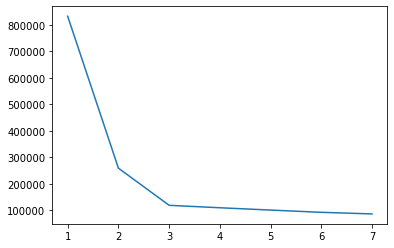

In [73]:
x = [i for i in range(1, 8)]
plt.plot(x, elbow);

In [74]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred = kmeans.fit_predict(df)

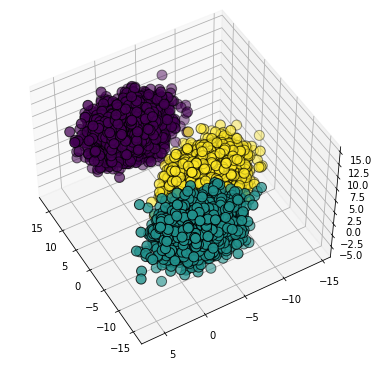

In [75]:
fignum = 1
fig = plt.figure(fignum, figsize=(5, 5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=150)

ax.scatter(df.iloc[:,0],df.iloc[:,1], df.iloc[:,2], c=y_pred.astype(float), edgecolor="k", s=100)
plt.show()

In [76]:
kmeans.cluster_centers_

array([[ 9.64449134, -0.80796792,  8.53935479],
       [-8.59025509, -2.55481828,  1.57637234],
       [-0.58978443, -6.90497214,  2.87581029]])

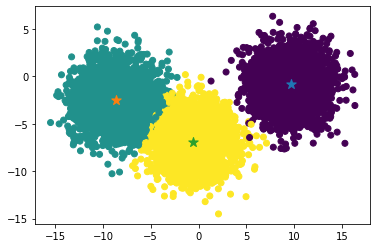

In [77]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], marker = '*', s= 100)
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], marker = '*', s= 100)
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], marker = '*', s= 100)
plt.show()

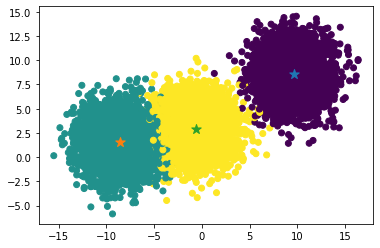

In [78]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 2], c=y_pred)
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][2], marker = '*', s= 100)
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][2], marker = '*', s= 100)
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][2], marker = '*', s= 100)
plt.show()

# DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

In [79]:
clustering = DBSCAN(eps=1.9, min_samples=15)

In [80]:
y_pred=clustering.fit_predict(df)

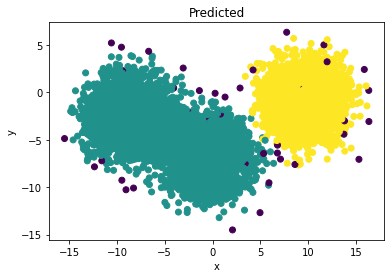

In [81]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred)
plt.title("Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [82]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

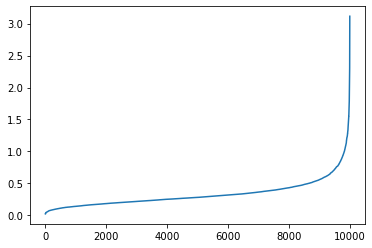

In [83]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

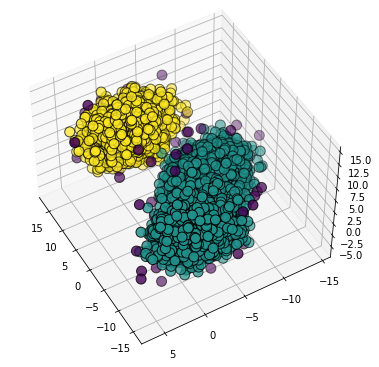

In [84]:
fig = plt.figure(fignum, figsize=(5, 5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=150)

ax.scatter(df.iloc[:,0],df.iloc[:,1], df.iloc[:,2], c=y_pred.astype(float), edgecolor="k", s=100)
plt.show()

# Dimensionality Reduction

In [100]:
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [94]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [95]:
scaled_data = preprocessing.StandardScaler().fit_transform(df)

In [96]:
from sklearn.manifold import MDS

In [97]:
mds = MDS(n_components=2)

In [98]:
mds_data = mds.fit_transform(scaled_data)

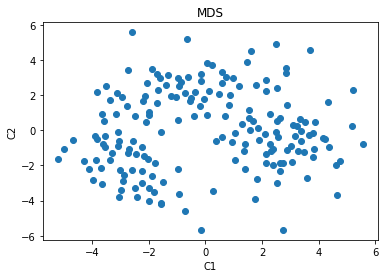

In [99]:
plt.scatter(x = mds_data[:, 0], y = mds_data[:, 1])
plt.title('MDS')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show()

In [101]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred = kmeans.fit_predict(scaled_data)

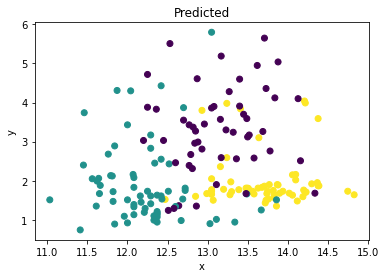

In [102]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred)
plt.title("Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [103]:
TSNE = TSNE(n_components=2)

In [104]:
TSNE_data = TSNE.fit_transform(scaled_data)

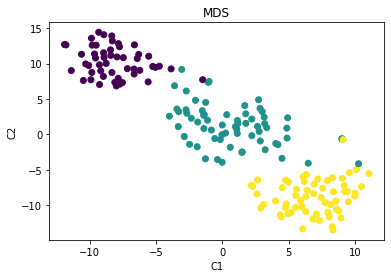

In [105]:
plt.scatter(x = TSNE_data[:, 0], y = TSNE_data[:, 1], c=y_pred)
plt.title('MDS')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show()